# Bivariate Gradient Descent vs. Newton-Raphson

<div style="width: 100%; overflow: hidden;">
     <div style="width: 75%; float: left;"> 
     The following example demonstrates bi-variate optimization using Gradient Descent and Newton-Raphson method. It is the goal to minimize the objective function $f(x,y)=(x-y)^4+2x^2+y^2-x+2y$ and compare the two optimization approaches. <div class="alert alert-block alert-info">
The provided example is authored by <b><a href="http://www.christopherhahne.de" style="text-decoration: none;">Christopher Hahne</a></b> and inspired by a <b><a href="https://www.math.colostate.edu/~gerhard/MATH331/lab/newton2d.html" style="text-decoration: none !important;">lab note</a></b> from Colorado State University.
 </div>
     <br>last update: 02/10/2020
     </div>
     <div style="margin-left: 80%;">
        <b>Author</b><br><br>
        <a href='http://www.christopherhahne.de', style="text-decoration: None; text-align: left;">
            <img align="left" src="http://www.christopherhahne.de/images/about.jpg" width="78"/>
            <br><br><br><br><br><br>
            <b>Christopher<br>Hahne, PhD</b>
        </a>
    </div>
</div>

As we aim to find the minimum of $f(x, y)$, we can take it directly as the objective function, which writes

$$f(x,y)=(x-y)^4+2x^2+y^2-x+2y$$

and implement it as

In [1]:
obj_fun = lambda x: (x[0]-x[1])**4 + 2*x[0]**2 + x[1]**2 - x[0] + 2*x[1]

To employ the gradient descent in the multivariate case, we may analytically construct its partial derivatives given by

$$\frac{\partial f}{\partial x}(x,y)=4(x-y)^3 + 4x-1$$

$$\frac{\partial f}{\partial y}(x,y)=-4(x-y)^3 + 2y+2$$

This is re-written in vector form as

$$\nabla \mathbf{F}(\mathbf{x}) = 
    \begin{bmatrix} \frac{\partial f}{\partial x}(x,y)\\ \frac{\partial f}{\partial y}(x,y)\end{bmatrix} =
      \begin{bmatrix}  4(x-y)^3 + 4x-1 \\ -4(x-y)^3 + 2y+2 \end{bmatrix}
$$
and implemented as

In [2]:
gradient = lambda x: [4*(x[0]-x[1])**3 + 4*x[0]-1, -4*(x[0]-x[1])**3 + 2*x[1]+2]

## Gradient Descent

The gradient descent is applicable for multivariate functions with dimensions $m$ such that $\textbf{x}\in\mathbb{R}^m$ in

$$\mathbf{x}_{k+1}=\mathbf{x}_k-\gamma \nabla \mathbf{F}(\mathbf{x}_k), \qquad  k \in \mathbb{N}$$

where $k$ is the iterative index, $\nabla \mathbf{F}(\cdot)$ the gradient of candidate $\mathbf{x}_k$ and $\gamma$ the learning rate. An implementation of the gradient descent is given below.

In [3]:
def multivar_descent(x, gradient, l=0.02, tol=1e-10, eps=1):
    x_list = []
    while tol<eps<100:
        x_list.append(x.copy())
        g = gradient(x)
        x -= np.multiply(l, g)
        eps = np.sum(np.abs(g)) # error
        
    return x_list, eps

## Newton-Raphson Method

For minimization, the Newton-Raphson approach can be generalized to $m$ variables with the first-order derivative $\nabla\mathbf{F}(\mathbf{x})\in\mathbb{R}^m$ from above and the second-order derivative $\mathbf{H}(\mathbf{x}) \in \mathbb{R}^{m\times m}$ as the Hessian matrix, which in our case is given by

$$
\mathbf H(\mathbf{x}) = \begin{bmatrix}
      \dfrac{\partial^2 f(x,y)}{\partial x^2} & \dfrac{\partial^2 f(x,y)}{\partial x \partial y}\\[1em]
      \dfrac{\partial^2 f(x,y)}{\partial y \partial x} & \dfrac{\partial^2 f(x,y)}{\partial y^2} \end{bmatrix}
      = \begin{bmatrix}
      12(x-y)^2 + 4 & -12(x-y)^2 \\
      -12(x-y)^2 & 12(x-y)^2 + 2 \end{bmatrix}
$$
and implemented as

In [4]:
hessian = lambda x: [[12*(x[0]-x[1])**2 + 4, -12*(x[0]-x[1])**2], [-12*(x[0]-x[1])**2, 12*(x[0]-x[1])**2 + 2]]

One thus obtains the iterative scheme

$$\mathbf{x}_{k+1} = \mathbf{x}_k - \gamma \big[\mathbf H(\mathbf{x}_k)\big]^{-1} \nabla\mathbf{F}(\mathbf{x}_k), \qquad  k \in \mathbb{N}$$

using the reciprocal of the second derivative with the invertible matrix of the Hessian matrix. Often this approach includes a small learning rate $ 0 < \gamma \le 1 $ instead of $\gamma=1$ to ensure that the Wolfe conditions are satisfied at each iteration. For step sizes other than 1, the method is referred to as the relaxed or damped Newton's method whose implementation is provided hereafter.

In [5]:
import numpy as np

def newton_hessian(x, gradient, hessian, l=1, tol=1e-10, eps=1):
    x_list = []
    while tol<eps<100:
        x_list.append(x.copy())
        g = gradient(x)
        H = hessian(x)
        x -= l*np.dot(np.linalg.inv(H), g)
        eps = np.sum(np.abs(g)) # error
        
    return x_list, eps

## Results


Gradient descent solution found at [ 0.03349047 -0.56698094] in 433 iterations with error 9.920952948050399e-12.
Newton method solution found at [ 0.03349047 -0.56698094] in 283 iterations with error 9.394707234378075e-12.


<IPython.core.display.Javascript object>


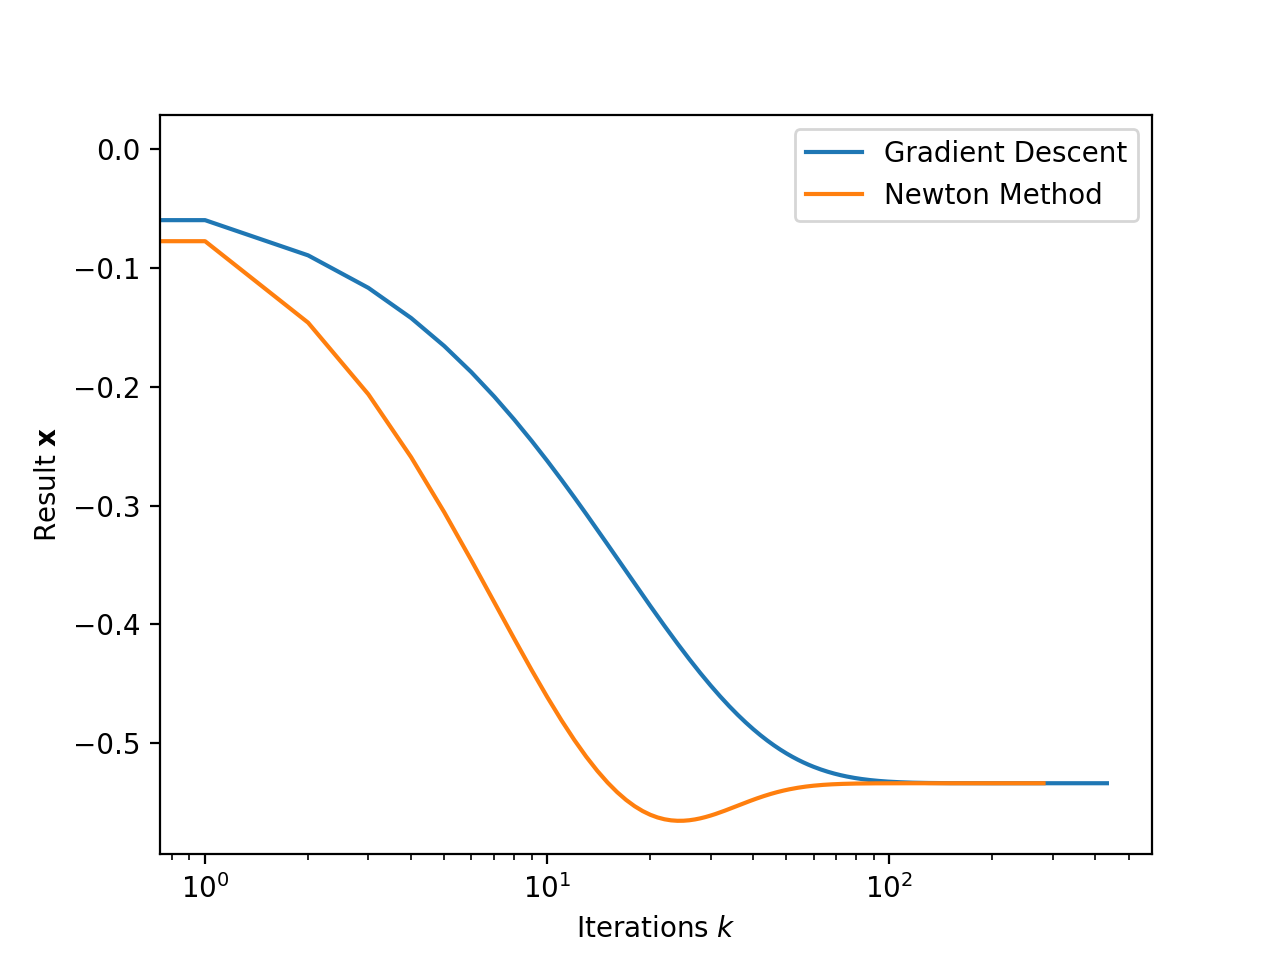

In [8]:
start_vals = [1., -1.]
tol = 1e-11
l=0.02
pts_dsc, eps = multivar_descent(start_vals, gradient, l, tol=tol)
print('Gradient descent solution found at %s in %s iterations with error %s.' % (pts_dsc[-1], len(pts_dsc), eps))
l=0.1
pts_hes, eps = newton_hessian(start_vals, gradient, hessian, l, tol)
print('Newton method solution found at %s in %s iterations with error %s.' % (pts_hes[-1], len(pts_hes), eps))

%matplotlib notebook
import matplotlib.pyplot as plt
plt.semilogx(range(len(pts_dsc)), np.sum(pts_dsc, -1), label='Gradient Descent')
plt.semilogx(range(len(pts_hes)), np.sum(pts_hes, -1), label='Newton Method')
#plt.xlim([1, max(len(pts_dsc), len(pts_hes))])
plt.xlabel('Iterations $k$')
plt.ylabel('Result $\mathbf{x}$')
plt.legend()

<IPython.core.display.Javascript object>


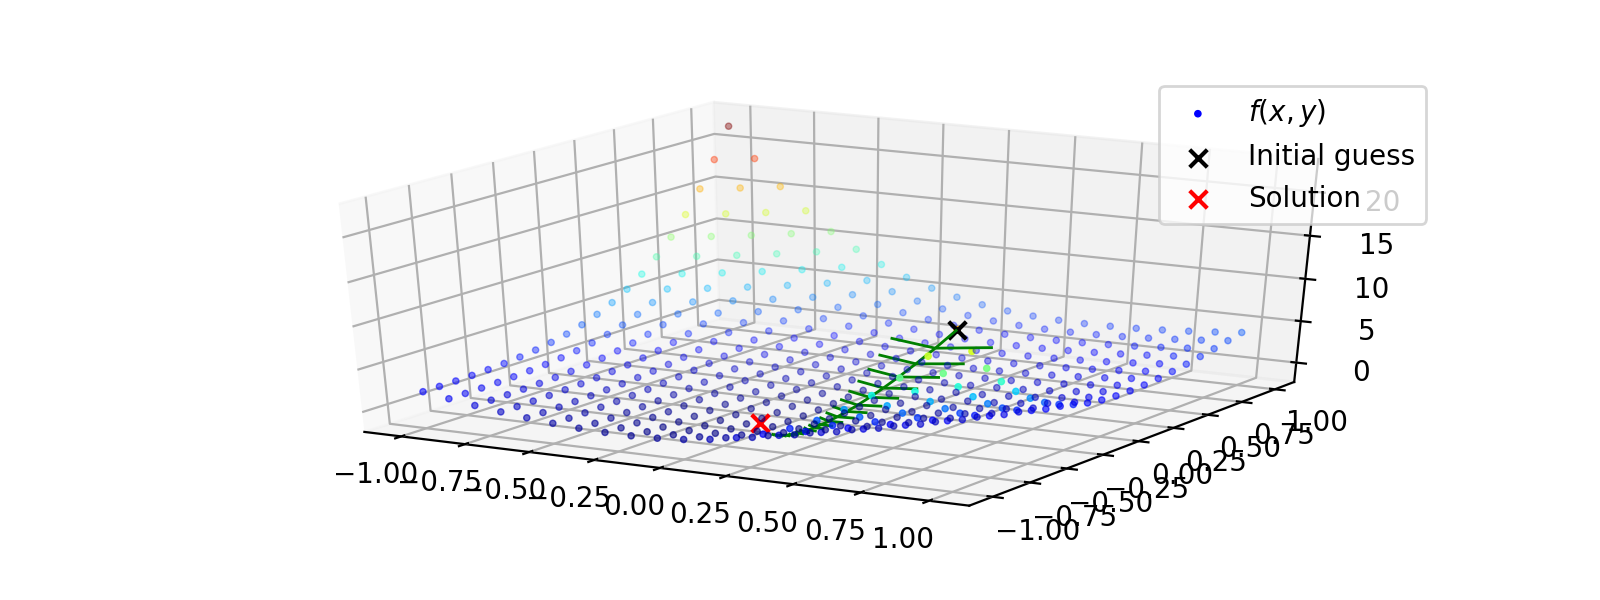

In [7]:
# compute grid
s = 1
x = np.linspace(-1*s, 1*s, int(20*s)+1)
y = np.linspace(-1*s, 1*s, int(20*s)+1)
xx, yy = np.meshgrid(x, y)
zz = obj_fun([xx, yy])

# import plot libs
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

# plot functions
fig, ax = (plt.figure(figsize=(8, 3)), plt.axes(projection='3d'))
ax.scatter(xx, yy, zz, c=zz/zz.max(), cmap=cm.jet, linewidth=.5, s=5, label='$f(x, y)$')
#ax.plot_wireframe(xx, yy, zz, cmap=cm.jet, linewidth=.5, color='orange', label='$f(x, y)$')
#ax.plot_trisurf(xx.flatten(), yy.flatten(), zz.flatten(), cmap=cm.jet, linewidth=.2, label='$f(x, y)$')

# initial guess and solution
pts = pts_hes #pts_dsc
ax.scatter(pts[0][0], pts[0][1], obj_fun(pts[0]), s=40, marker='x', color='k', label='Initial guess')
ax.scatter(pts[-1][0], pts[-1][1], obj_fun(pts[-1]), s=40, marker='x', color='red', label='Solution')

# plot gradient steps
x_p = pts[0]
z_p = obj_fun(x_p)
for x_k in pts[1:min(25, len(pts))]:
    z_k = obj_fun(x_k)
    ax.quiver(x_p[0], x_p[1], z_p, x_k[0]-x_p[0], x_k[1]-x_p[1], z_k-z_p, linewidth=1, color='green')
    x_p, z_p = x_k, z_k

ax.legend()